In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# 데이터셋 인스턴스 생성

data = pd.read_csv('C:/Users/ghom9/Downloads/BP_data.csv')  # CSV 파일 경로
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [4]:
for i in ['Genetic_Pedigree_Coefficient', 'Pregnancy', 'alcohol_consumption_per_day']:
    mean_age = data[i].mean()

    data['AGenetic_Pedigree_Coefficientge'] = data[i].fillna(mean_age)

    most_common_embarked = data[i].mode()[0]

    data[i] = data[i].fillna(most_common_embarked)

    data.isnull().sum()

In [5]:
print(data.isna().sum())

Patient_Number                     0
Blood_Pressure_Abnormality         0
Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient       0
Age                                0
BMI                                0
Sex                                0
Pregnancy                          0
Smoking                            0
Physical_activity                  0
salt_content_in_the_diet           0
alcohol_consumption_per_day        0
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
AGenetic_Pedigree_Coefficientge    0
dtype: int64


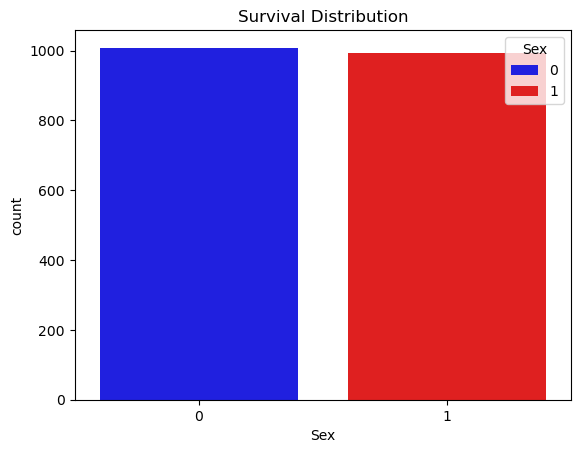

Sex
0    0.504
1    0.496
Name: proportion, dtype: float64


In [6]:
# 레이블 확인 (imbalanced data) -> 목표변수의 분포를 확인하여 데이터 불균형확인

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', data=data, hue='Sex', palette=['blue', 'red']) #Survived 컬럼의 데이터 개수를 시각화
plt.title("Survival Distribution") #그래프 제목 설정
plt.show()                         #그래프 출력
print(data['Sex'].value_counts(normalize=True))

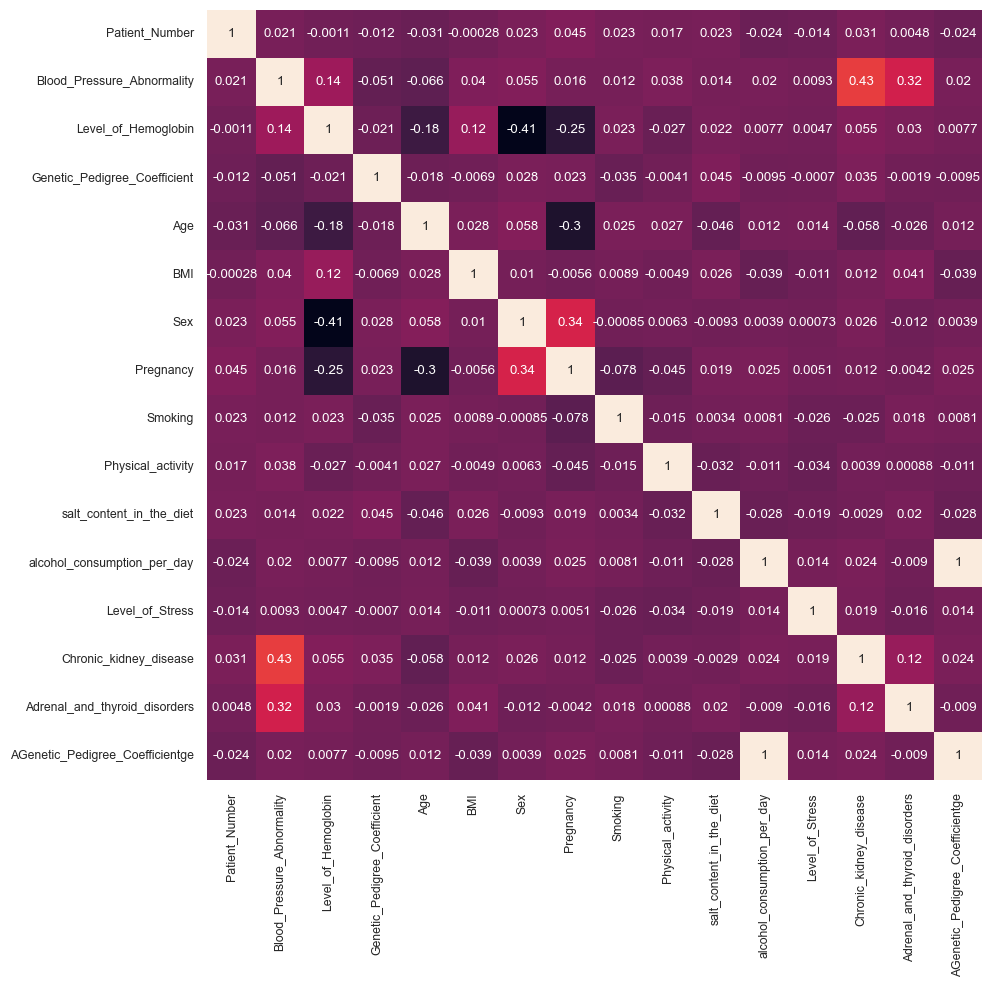

In [7]:
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

C:\Users\ghom9\AppData\Local\Temp\ipykernel_10776\3268784338.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


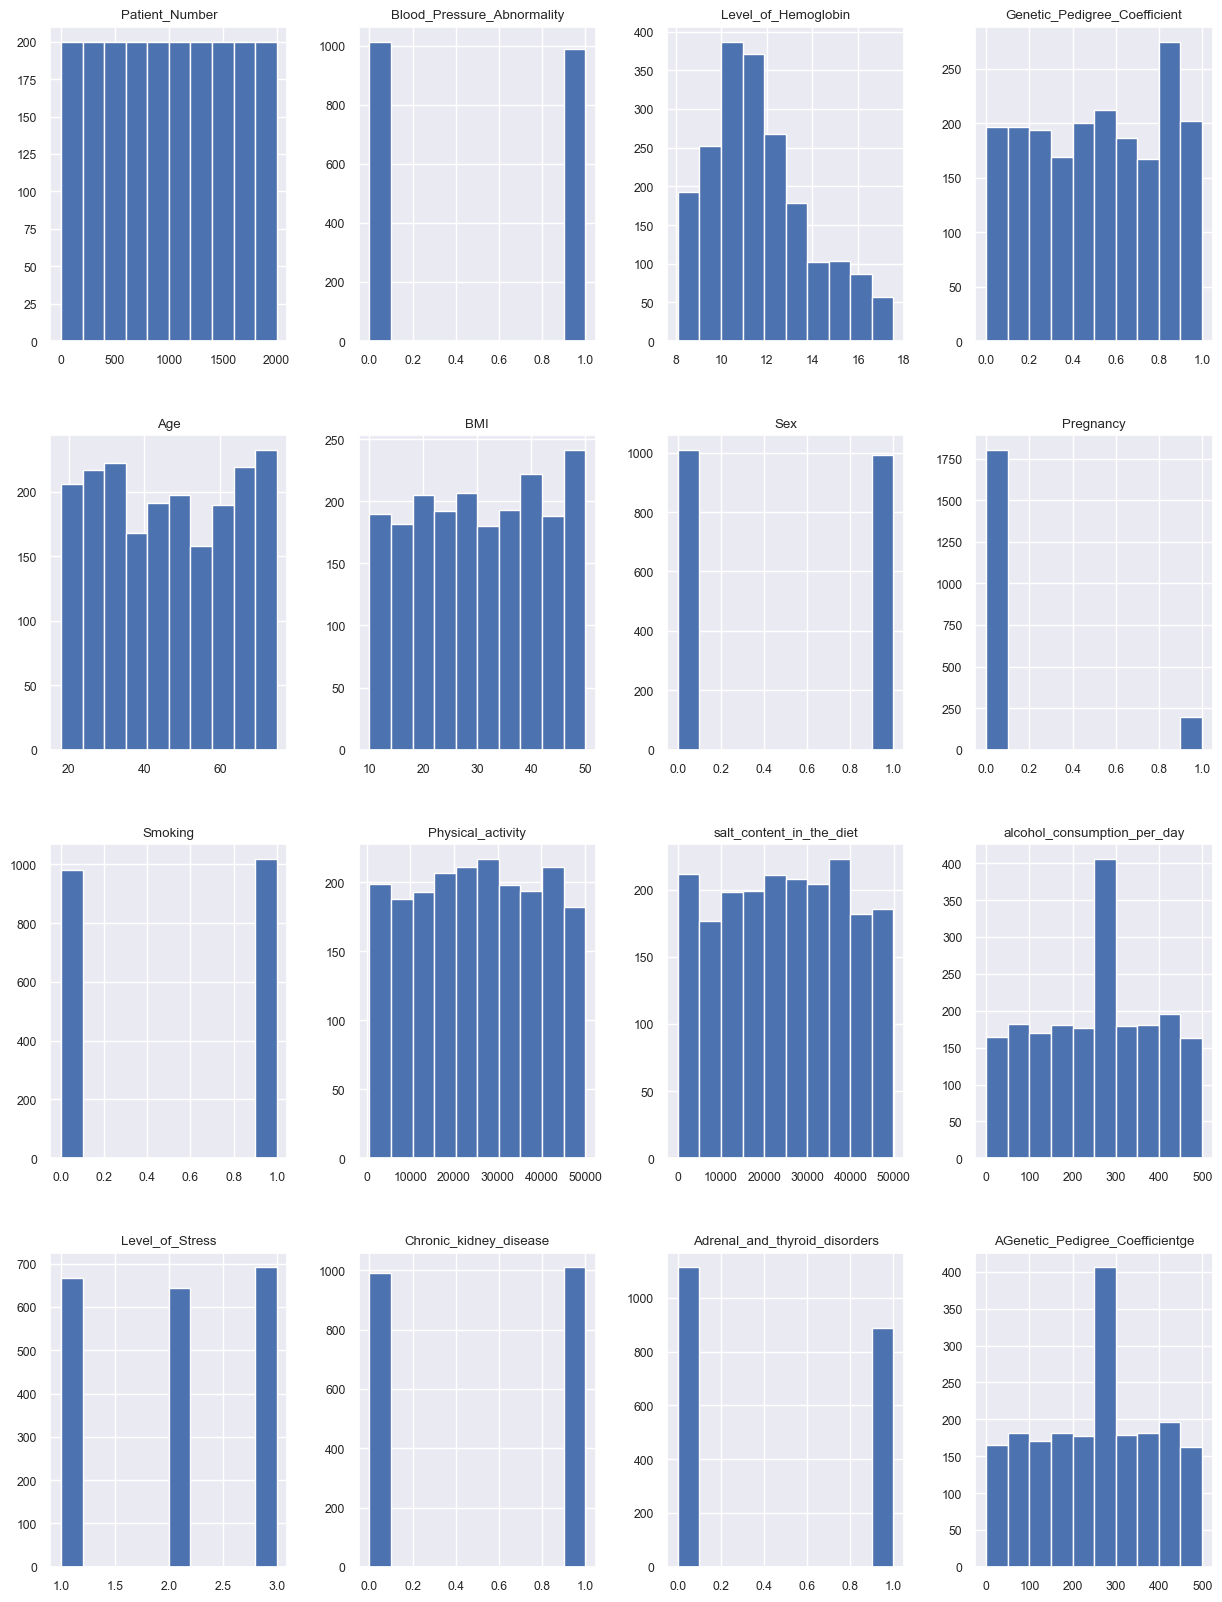

In [8]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

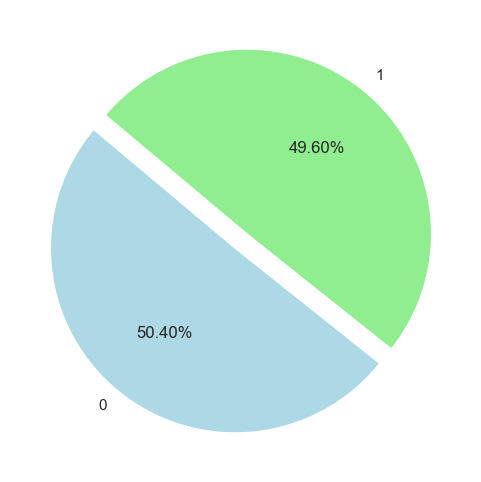

In [12]:
bp_counts = data["Sex"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(bp_counts, labels=bp_counts.index, autopct="%0.2f%%", colors=["lightblue", "lightgreen"], explode=(0.05, 0.05), startangle=140)
plt.show()

C:\Users\ghom9\AppData\Local\Temp\ipykernel_10776\2527404026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BMI", data=data, palette="Set3")


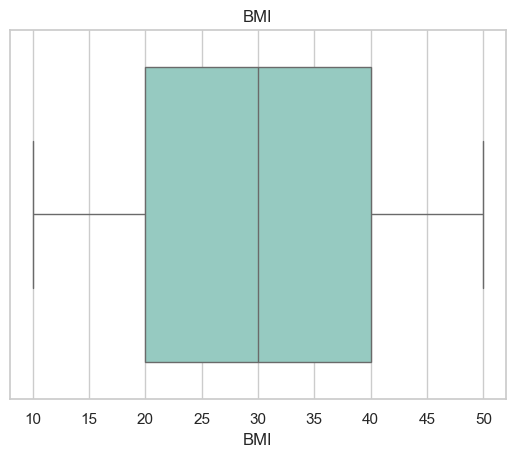

In [10]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="BMI", data=data, palette="Set3")
plt.title("BMI")
plt.show()